In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500) # Setting the maximum number of columns to display to 500

In [3]:
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [5]:
df = EA.clean(df)

In [6]:
df.head()

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,hourlyrate,dailyrate,monthlyrate,monthlyincome,businesstravel,overtime,distancefromhome,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,performancerating,stockoptionlevel,jobsatisfaction,attrition,employeecount
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,8,0,6,4,0,5,11,94,1102,19479,5993,travel_rarely,yes,1,1,2,3,1,3,0,4,yes,1
2,49,male,married,life sciences,research & development,research scientist,2,1,10,3,10,7,1,7,23,61,279,24907,5130,travel_frequently,no,8,3,3,2,4,4,1,2,no,1
4,37,male,single,other,research & development,laboratory technician,1,6,7,3,0,0,0,0,15,92,1373,2396,2090,travel_rarely,yes,2,3,4,2,2,3,0,3,yes,1
5,33,female,married,life sciences,research & development,research scientist,1,1,8,3,8,7,3,0,11,56,1392,23159,2909,travel_frequently,yes,3,3,4,3,3,3,0,3,no,1
7,27,male,married,medical,research & development,laboratory technician,1,9,6,3,2,2,2,2,12,40,591,16632,3468,travel_rarely,no,2,3,1,3,4,3,1,2,no,1


In [7]:
my_col = ('#c7e9b4', '#40E0D0', '#D2B48C', '#EEE8AA','#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')

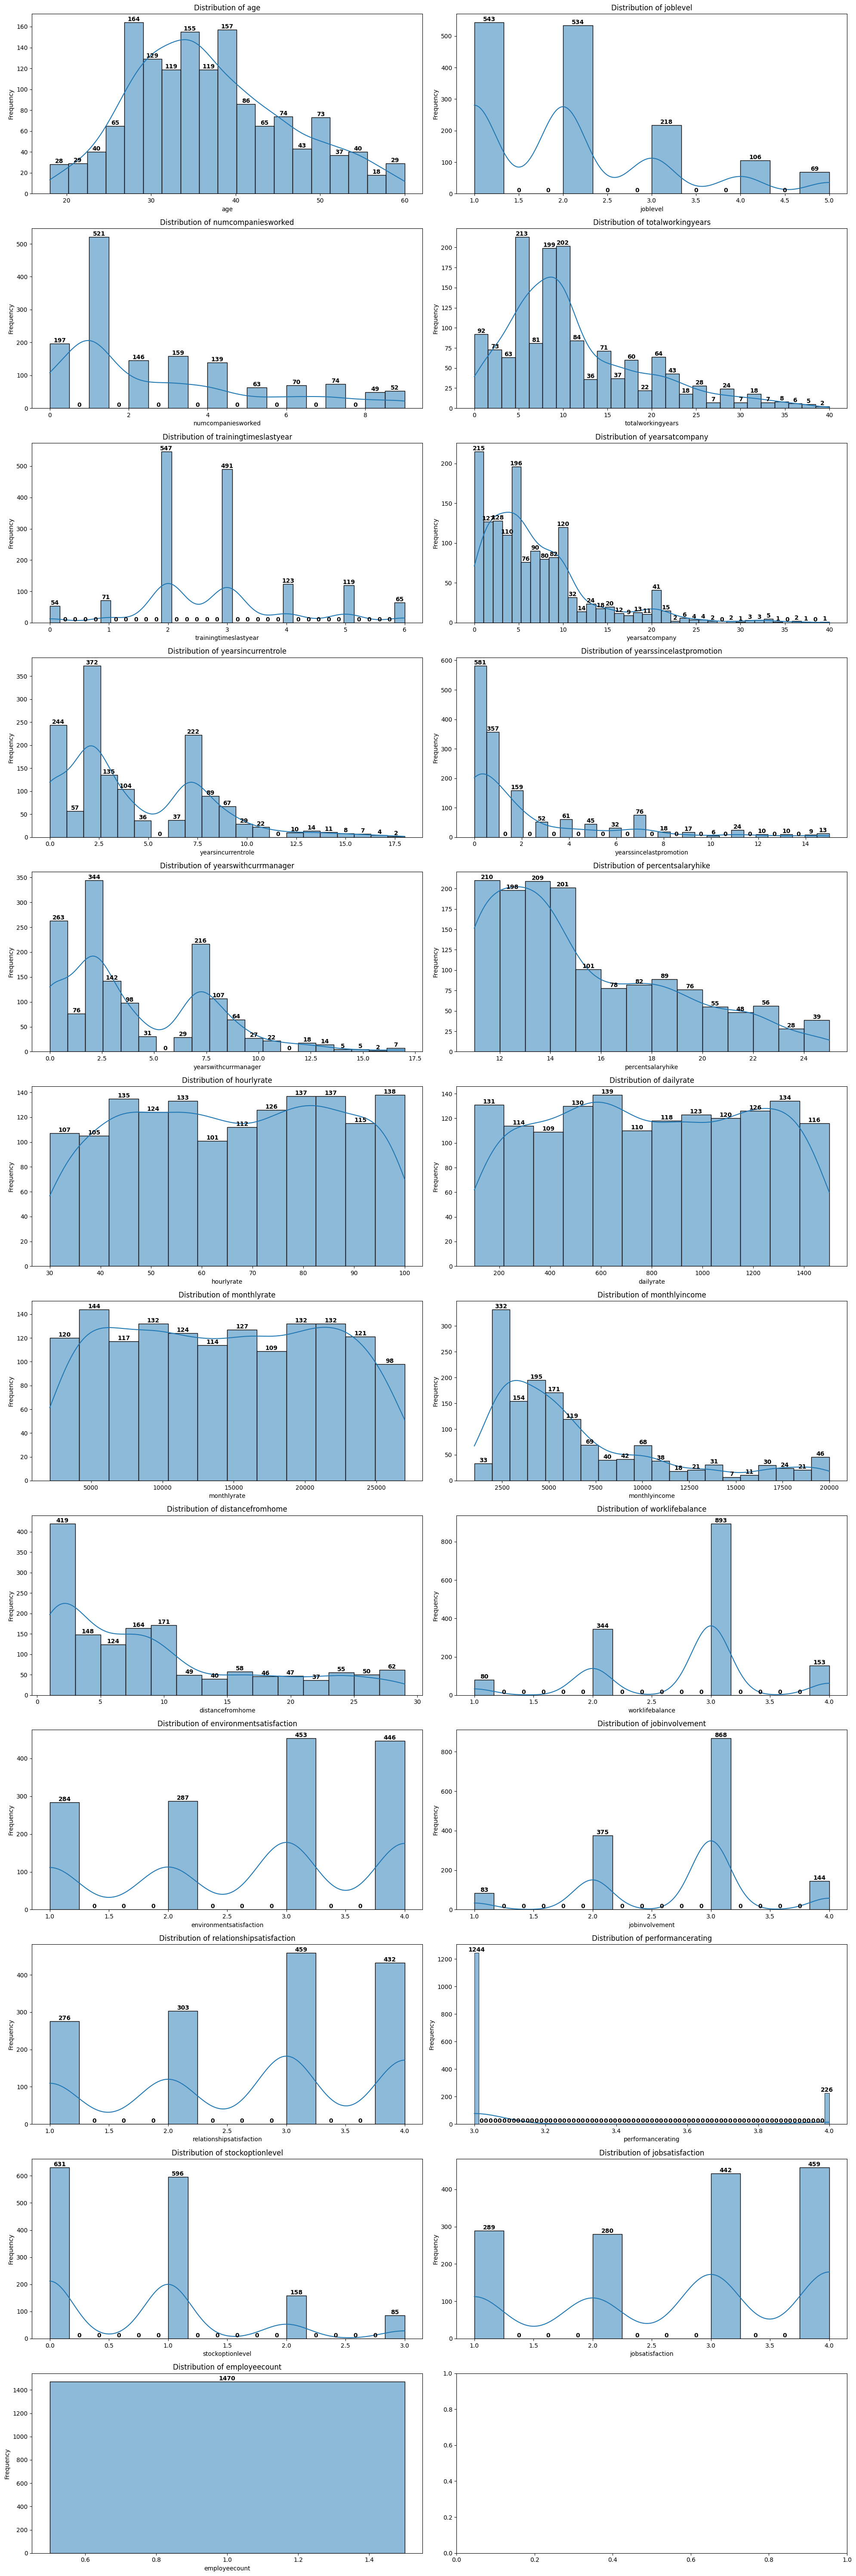

In [8]:
n_col = 2
n_row = (len(df.select_dtypes('int64').columns)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (20,5 * n_row))
ax = ax.flatten()

for i,col in enumerate(df.select_dtypes('int64').columns):
    sns.histplot(df,x=col,ax=ax[i],palette='viridis',kde=True)
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    ax[i].set_title("Distribution of {}".format(col))
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frequency")     
plt.tight_layout()
plt.show()
    

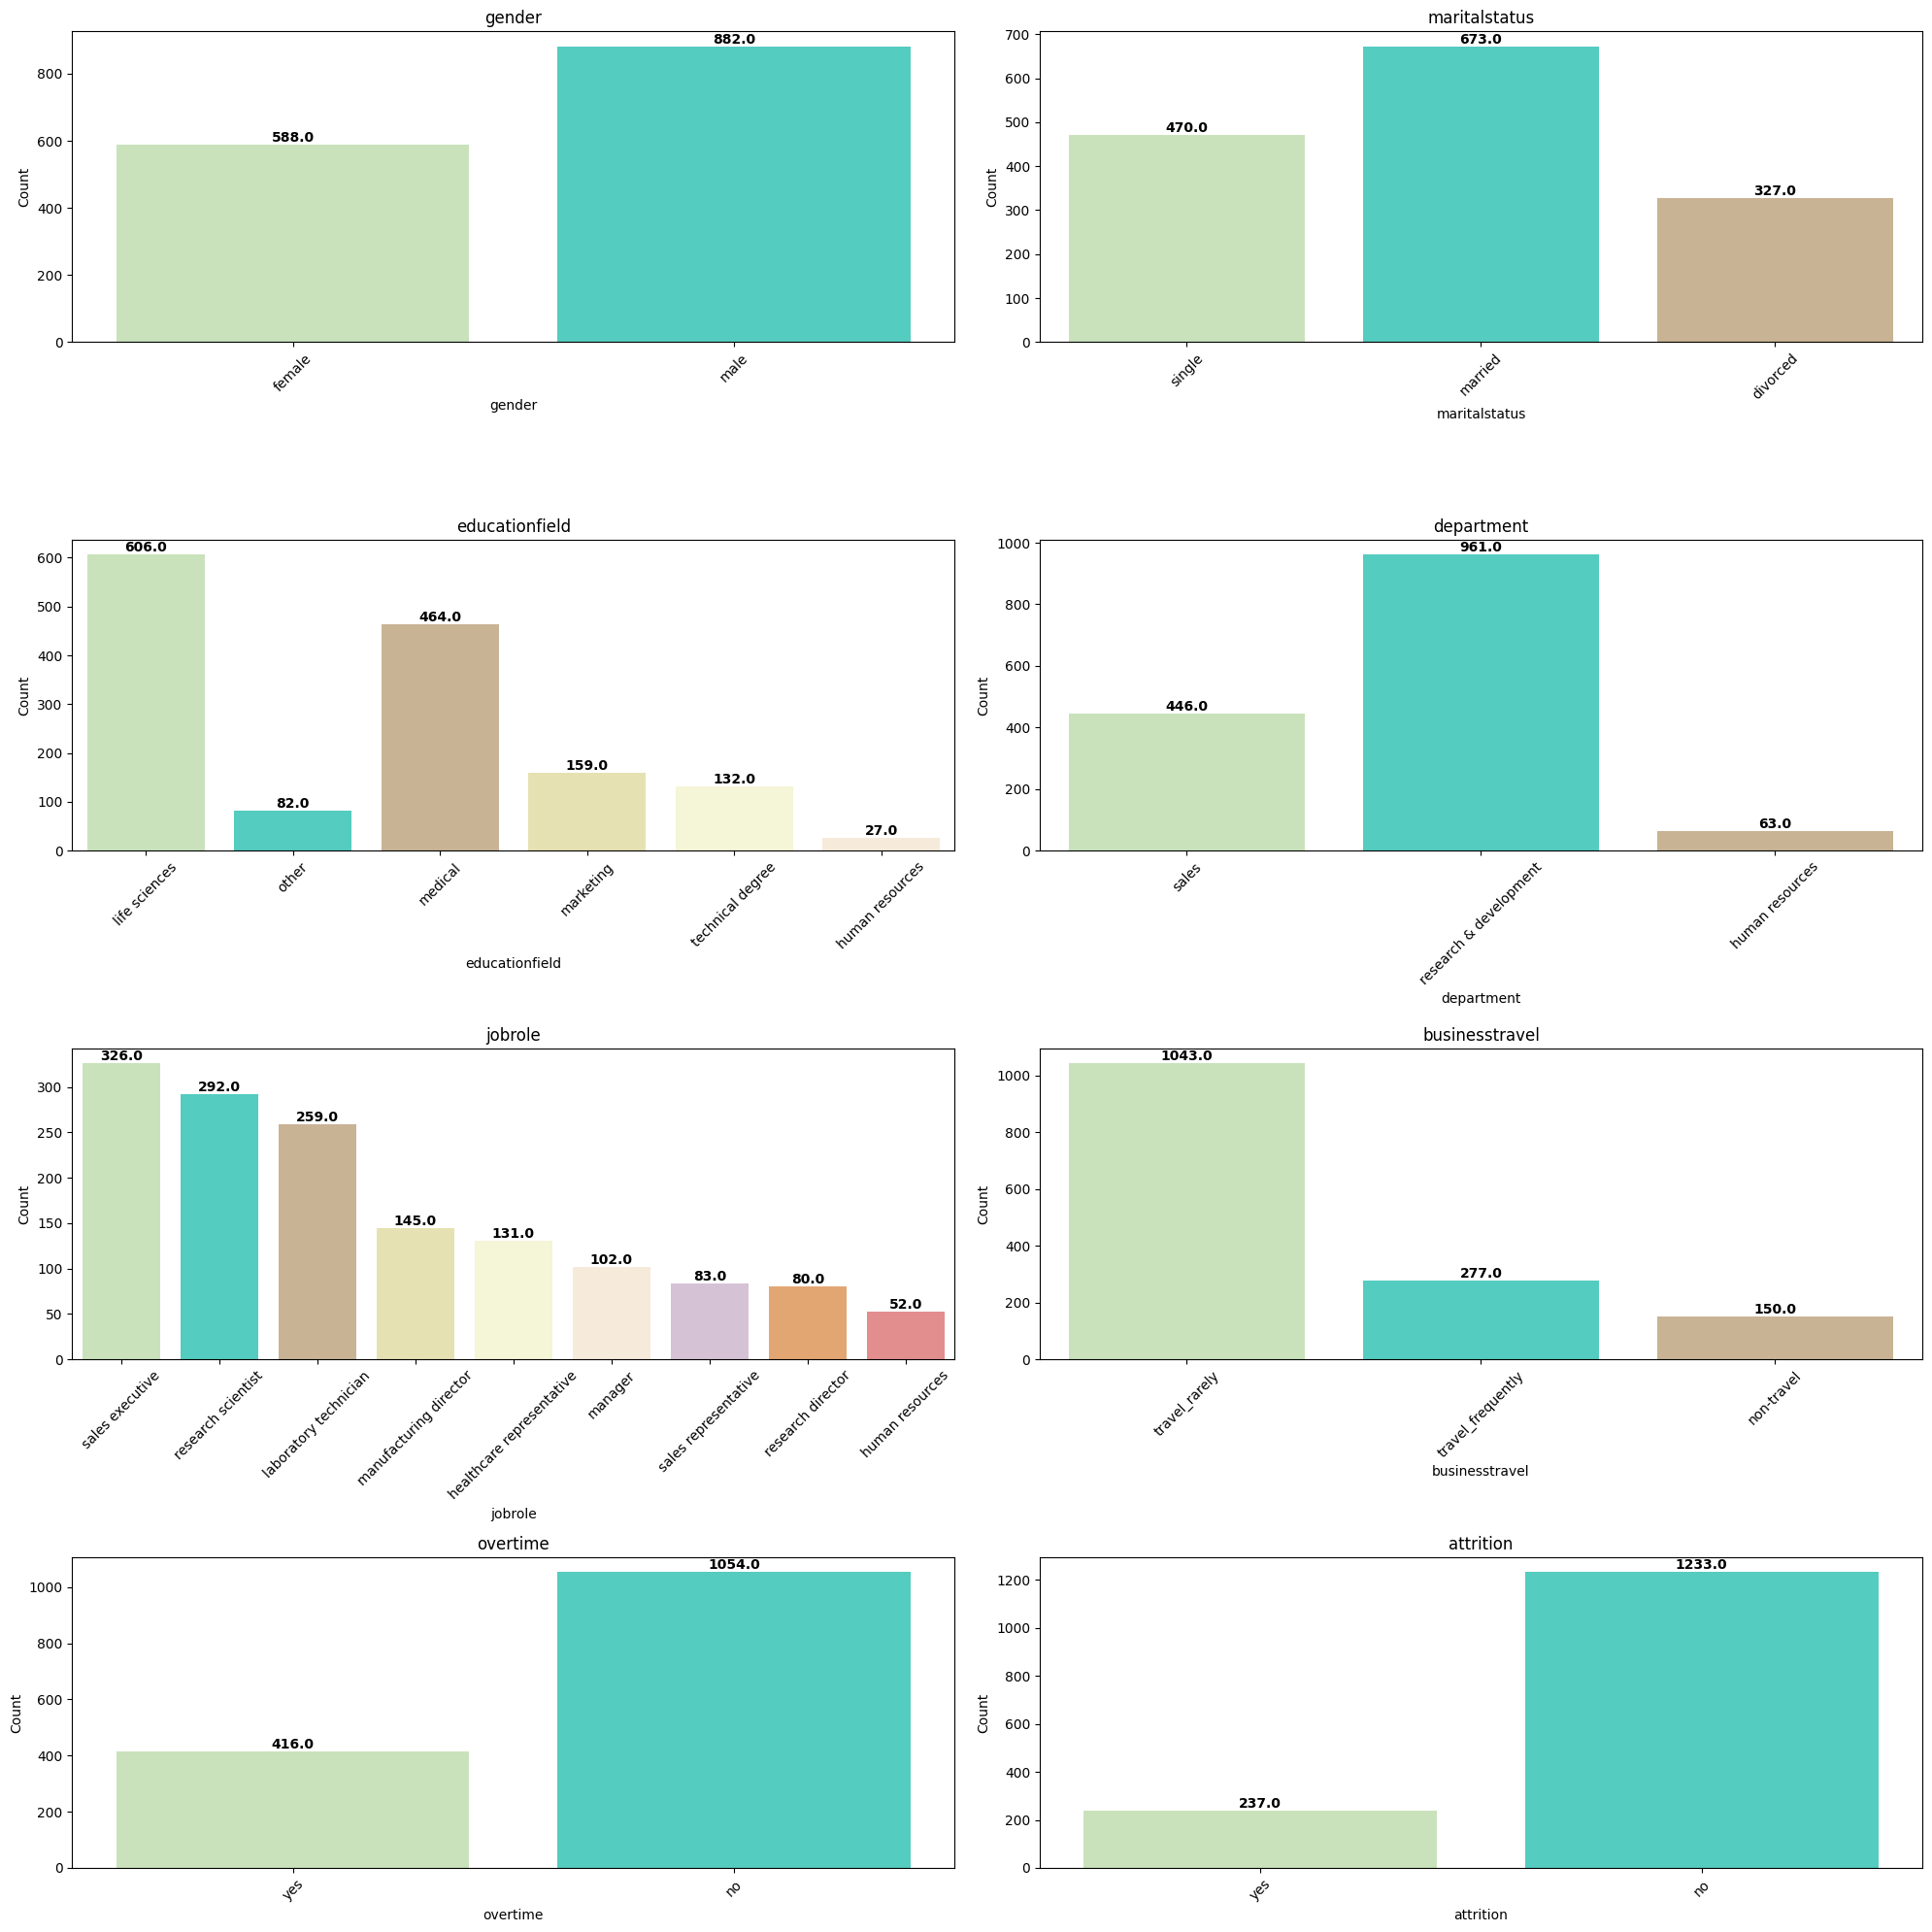

In [9]:
n_col = 2
n_row = (len(df.select_dtypes('object').columns)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (20,5 * n_row))
ax = ax.flatten()

for i,col in enumerate(df.select_dtypes('object').columns):
    sns.countplot(data=df,x=col,ax=ax[i],palette=my_col,)
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=45)
     
plt.tight_layout()
plt.show()
    

## Attrition Analysis

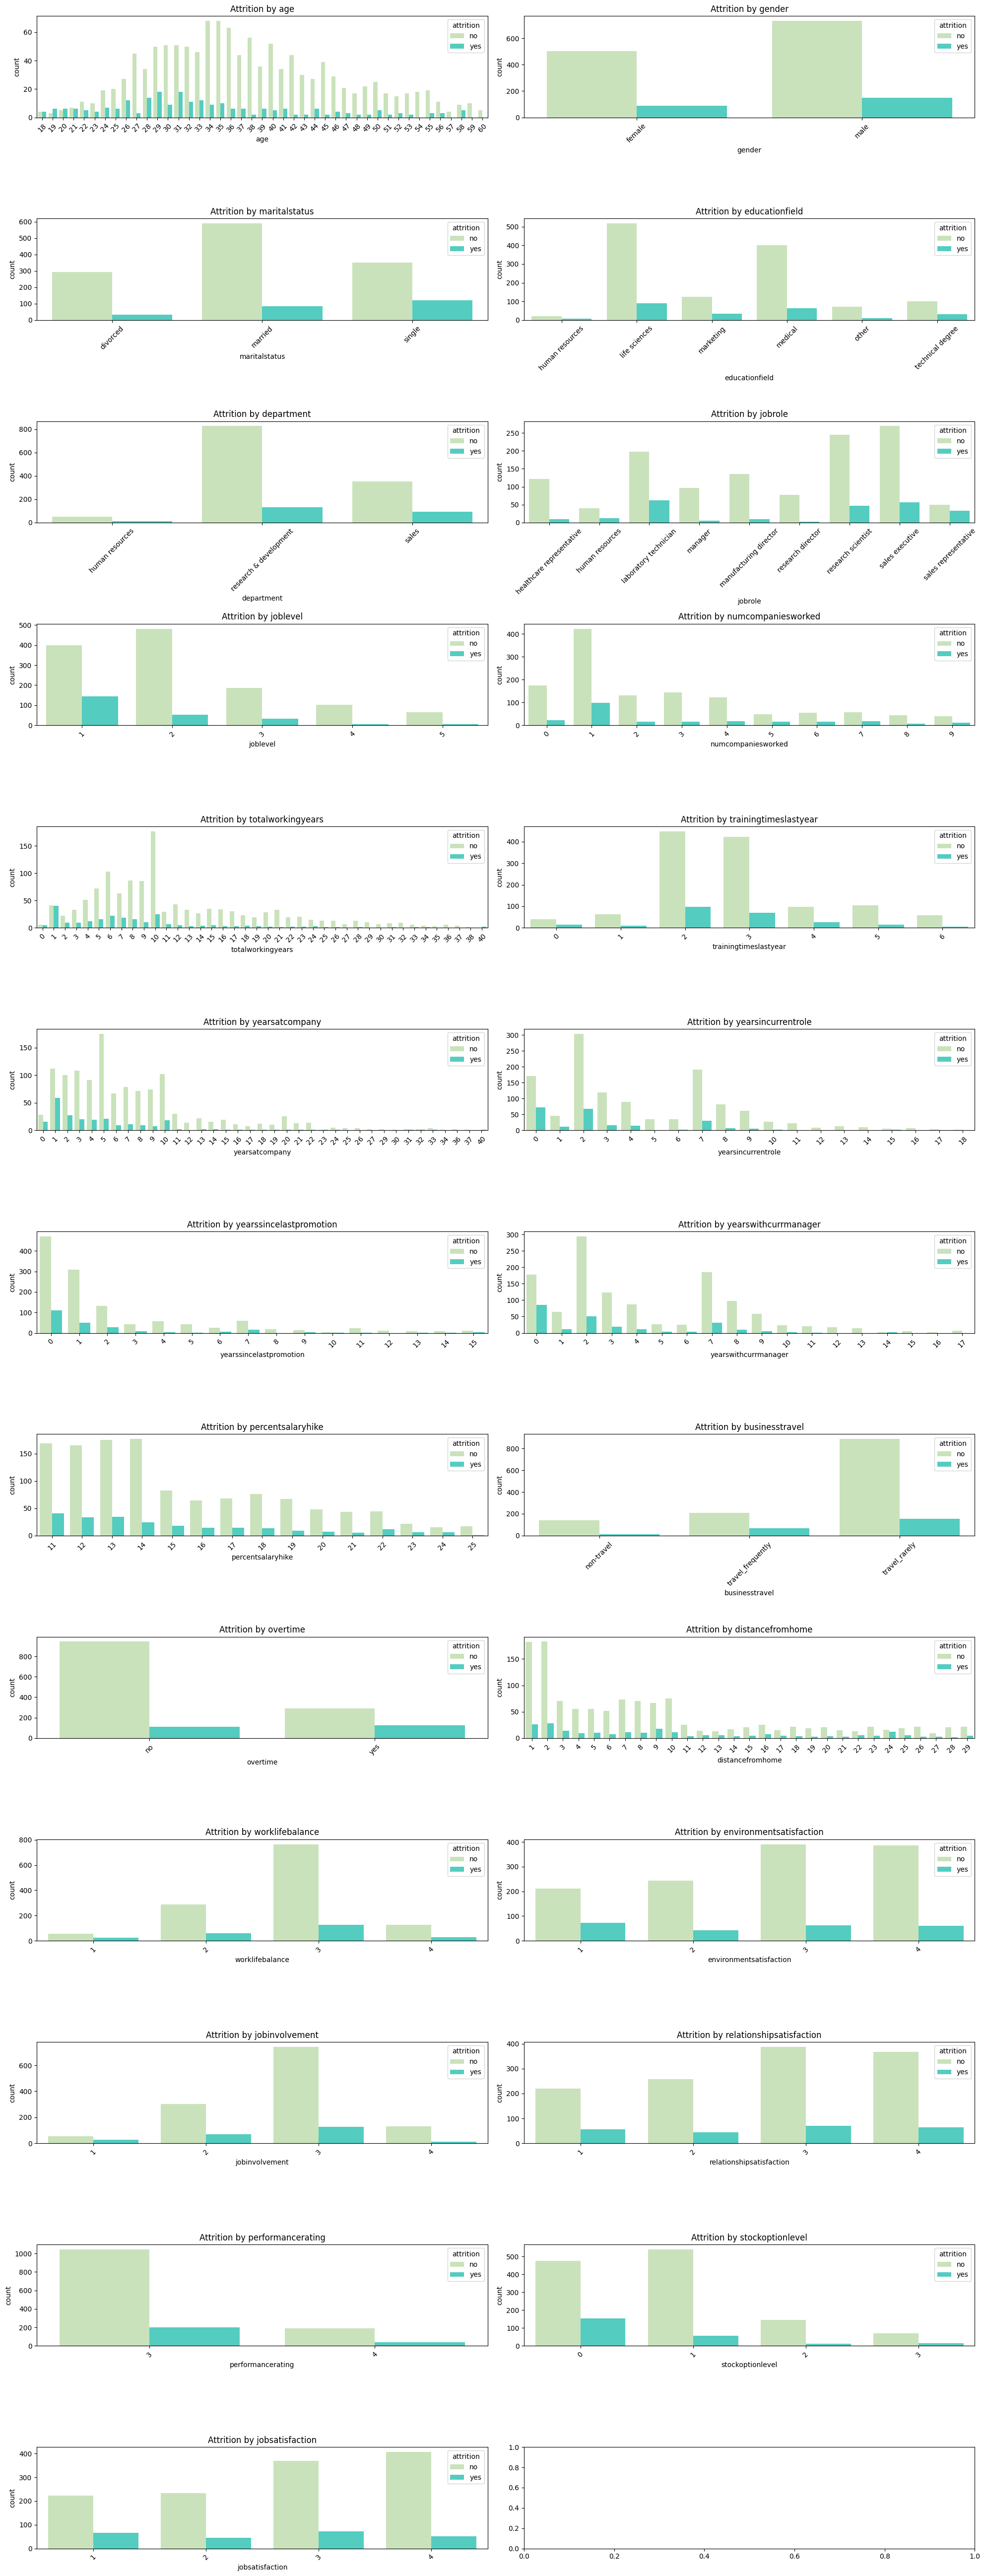

In [10]:
l_col = ['age', 'gender', 'maritalstatus', 'educationfield', 'department','jobrole', 'joblevel',
         'numcompaniesworked', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike',
       'businesstravel', 'overtime', 'distancefromhome', 'worklifebalance',
       'environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction',
       'performancerating', 'stockoptionlevel','jobsatisfaction']
n_col = 2
n_row = (len(l_col)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (20,4 * n_row))
ax = ax.flatten()

for i,col in enumerate(l_col) :
    temp_df = df.groupby([col,'attrition'])['employeecount'].count().reset_index()
    temp_df.columns = [col,'attrition','count']
    
    sns.barplot(x=col,y='count',hue='attrition',data=temp_df,palette=my_col,ax=ax[i])
    ax[i].set_title(f'Attrition by {col}')
    ax[i].tick_params(axis='x',rotation=45)
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

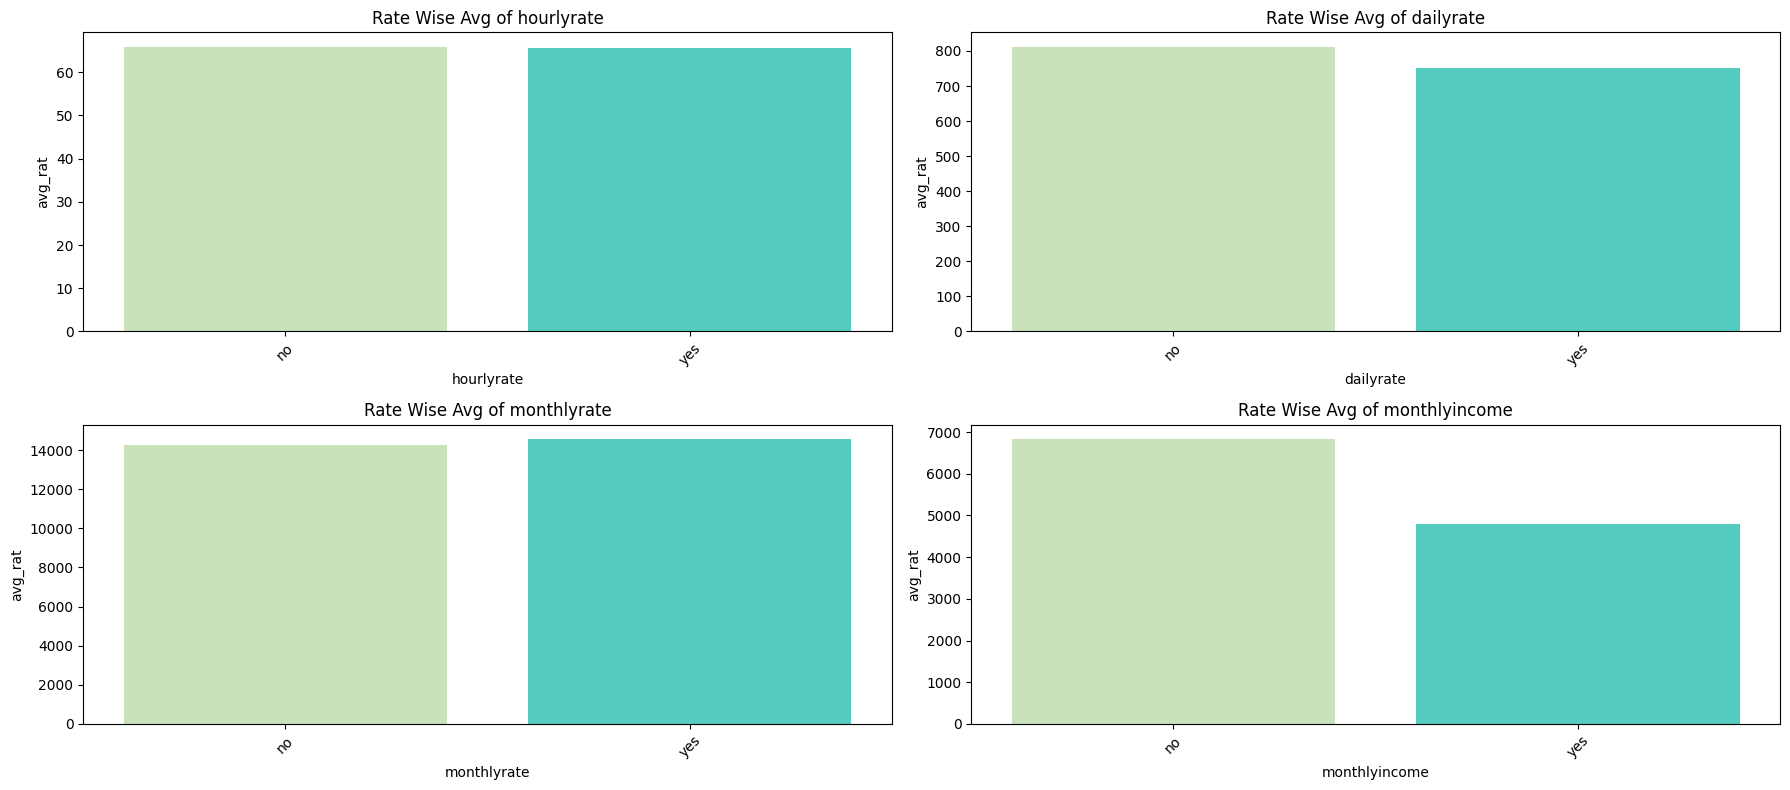

In [11]:

sal_l = ['hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome']

n_col = 2
n_row = (len(sal_l)+1) // n_col

fig, ax = plt.subplots(n_row,n_col, figsize = (18,4 * n_row))
ax = ax.flatten()

for i,col in enumerate(sal_l) :
    temp_df = df.groupby(['attrition'])[col].mean().reset_index()
    temp_df.columns = [col,'avg_rat']
    
    sns.barplot(x=col,y='avg_rat',data=temp_df,palette=my_col,ax=ax[i])
    ax[i].set_title(f'Rate Wise Avg of {col}')
    ax[i].tick_params(axis='x',rotation=45)
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

### Age Analysis

In [12]:
hue_or = ['no','yes']

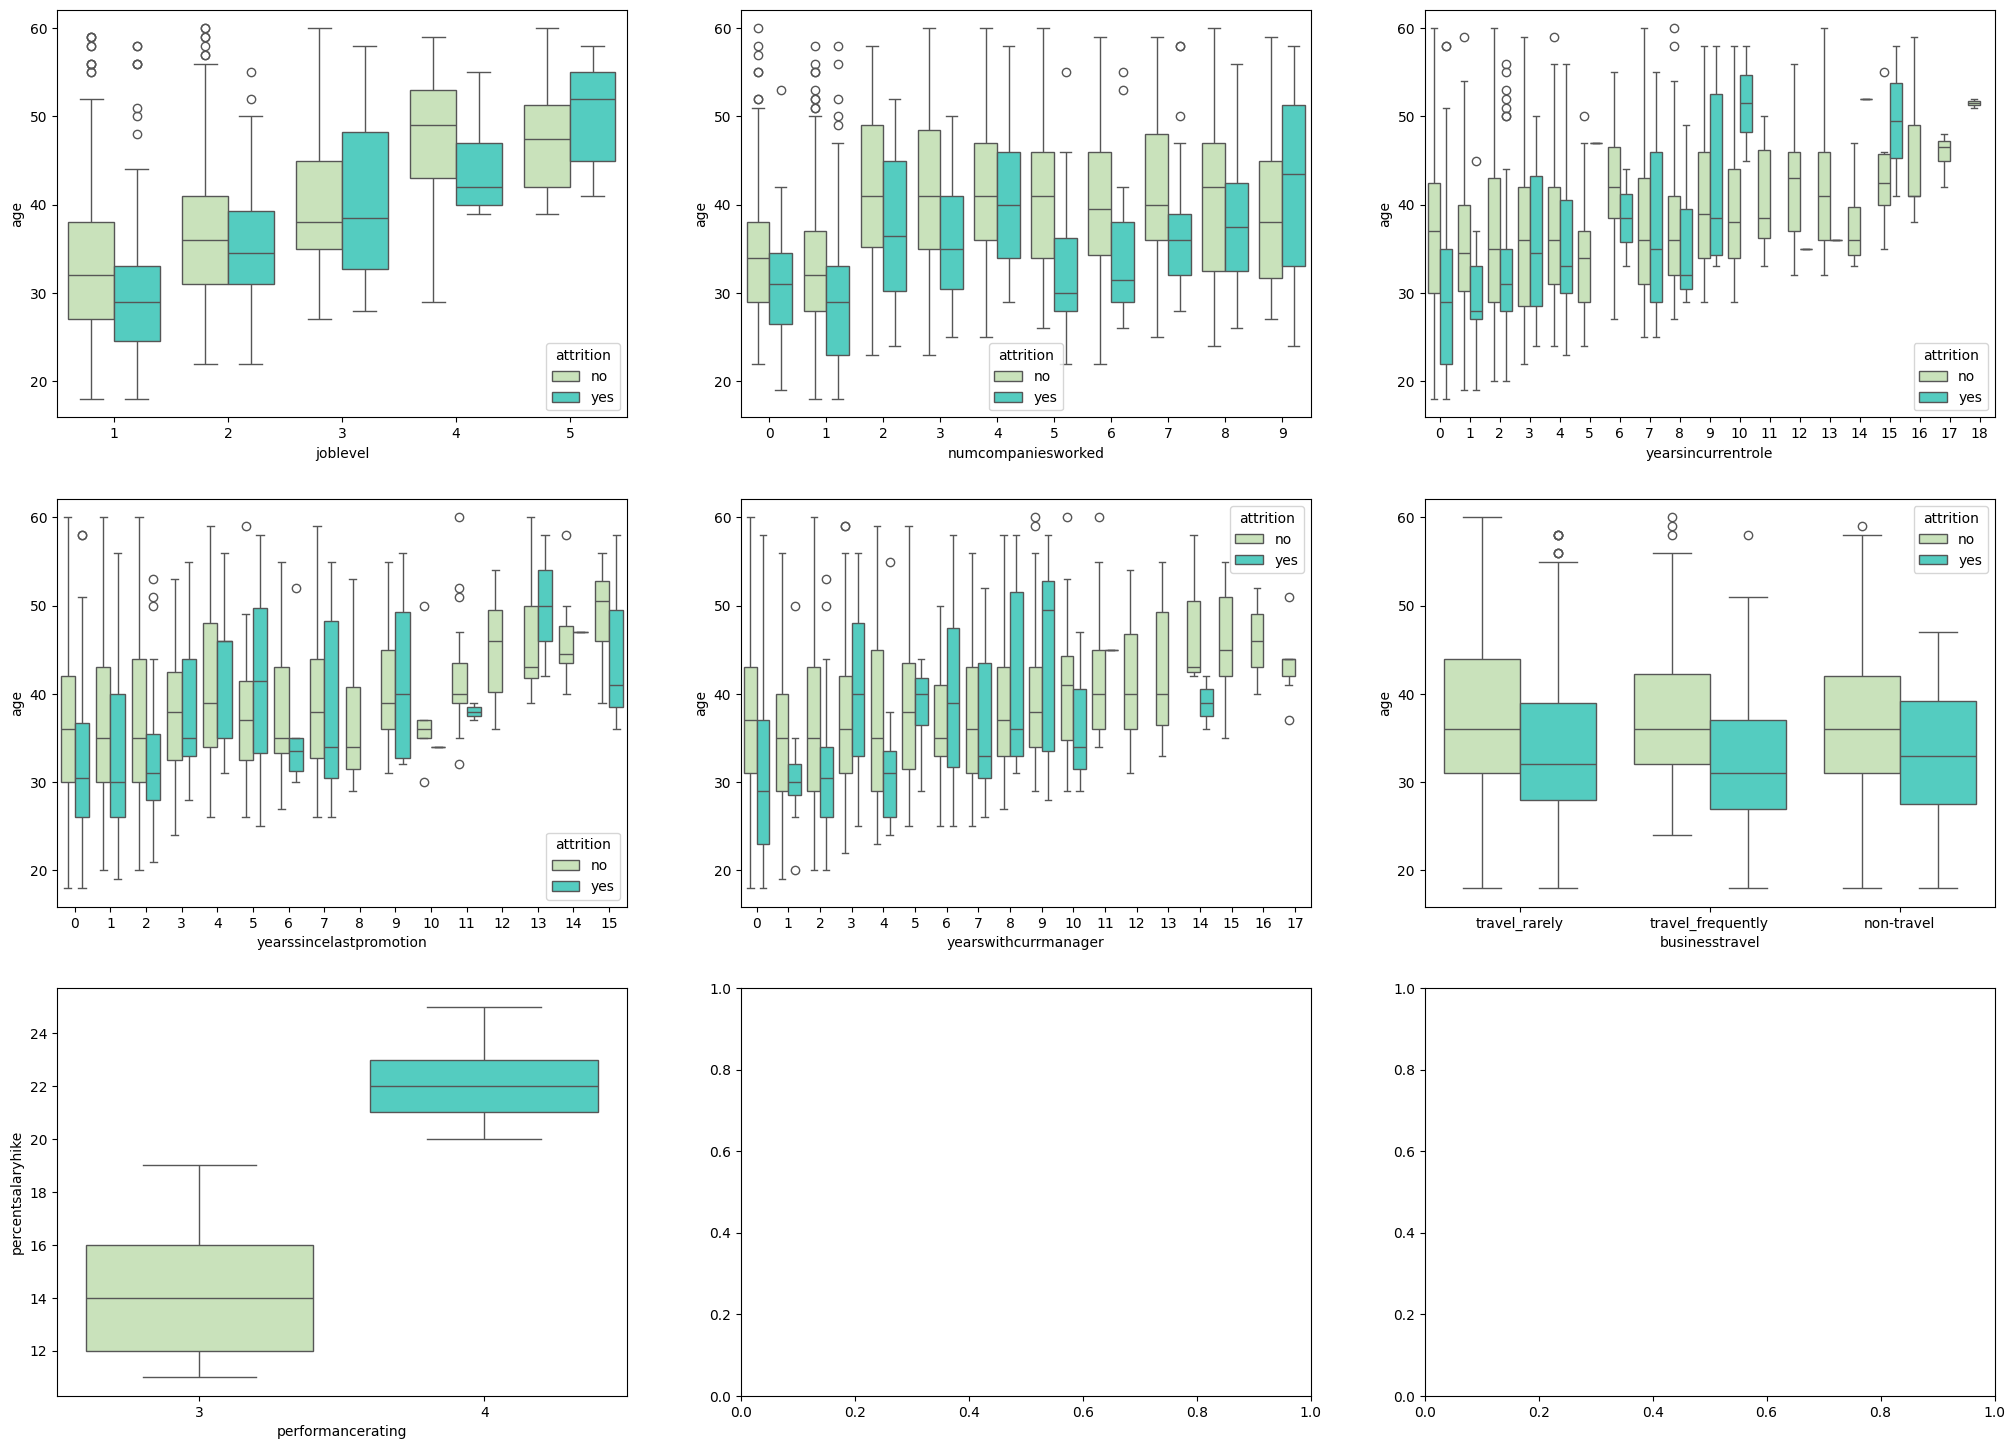

In [13]:
fig,ax = plt.subplots(3,3,figsize=(25,18))

sns.boxplot(data=df, x='joblevel',y ='age',palette=my_col,hue='attrition',hue_order=hue_or,ax=ax[0][0])

sns.boxplot(data=df,x='numcompaniesworked',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[0][1])

sns.boxplot(data=df,x='yearsincurrentrole',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[0][2])

sns.boxplot(data=df,x='yearssincelastpromotion',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1][0])

sns.boxplot(data=df,x='yearswithcurrmanager',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1][1])

sns.boxplot(data=df,x='businesstravel',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1][2])

sns.boxplot(data=df,x='performancerating',y='percentsalaryhike',palette=my_col,ax=ax[2][0])

plt.show()

<Axes: xlabel='jobrole', ylabel='percentsalaryhike'>

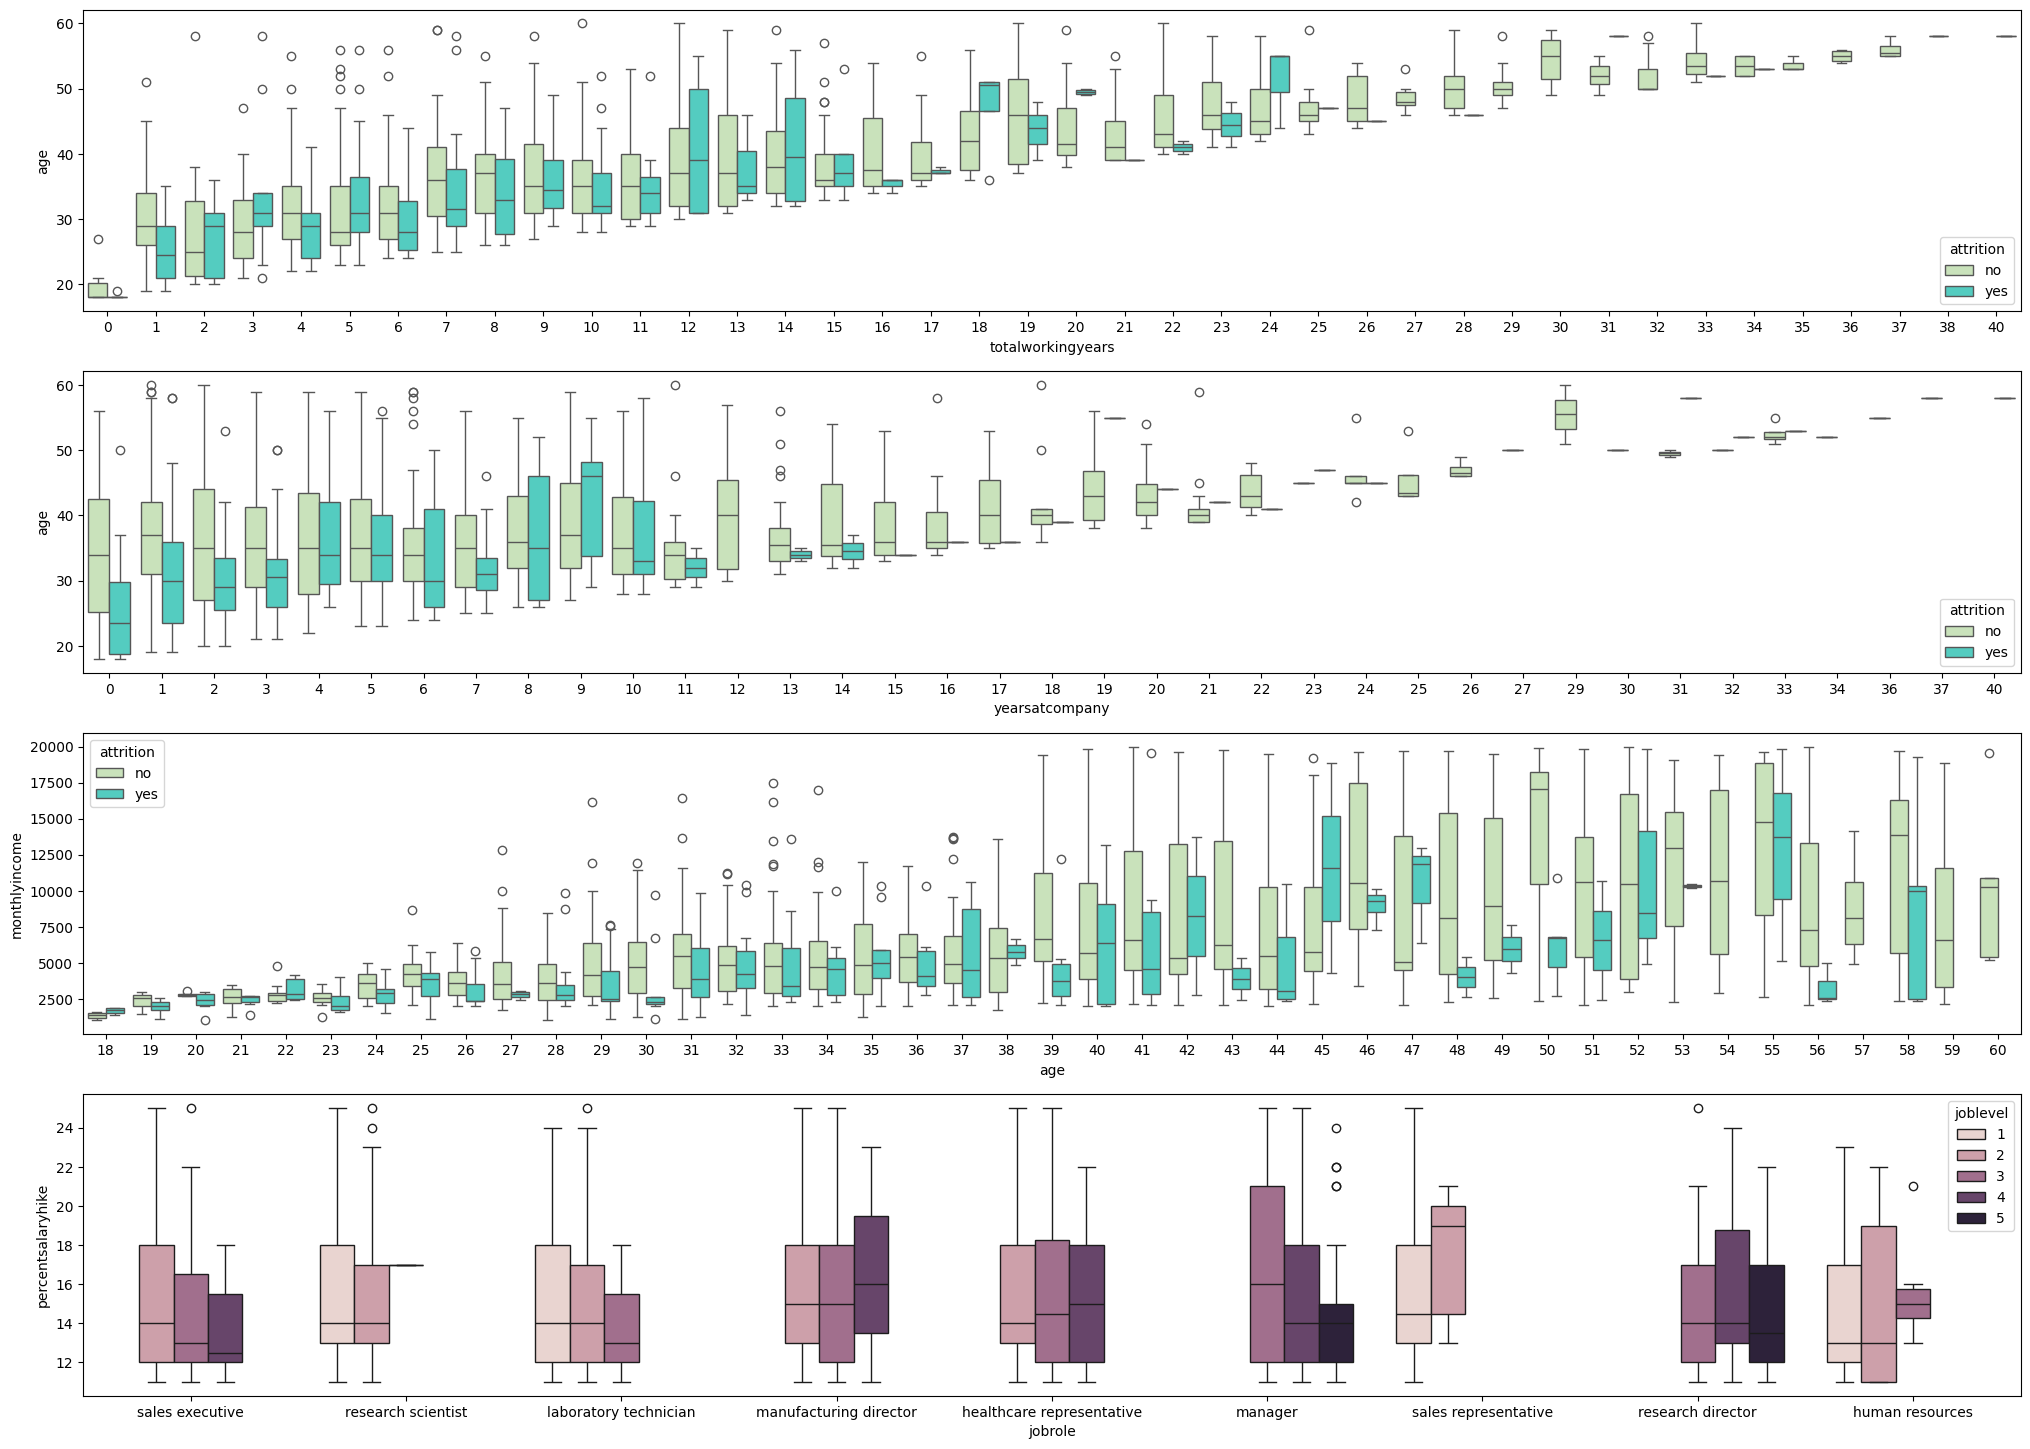

In [14]:
fig,ax = plt.subplots(4,figsize=(25,18))
sns.boxplot(data=df,x='totalworkingyears',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[0])

sns.boxplot(data=df,x='yearsatcompany',y='age',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[1])

sns.boxplot(data=df,x='age',y='monthlyincome',hue='attrition',palette=my_col,hue_order=hue_or,ax=ax[2])

sns.boxplot(data=df,x='jobrole',y='percentsalaryhike',hue='joblevel',ax=ax[3])


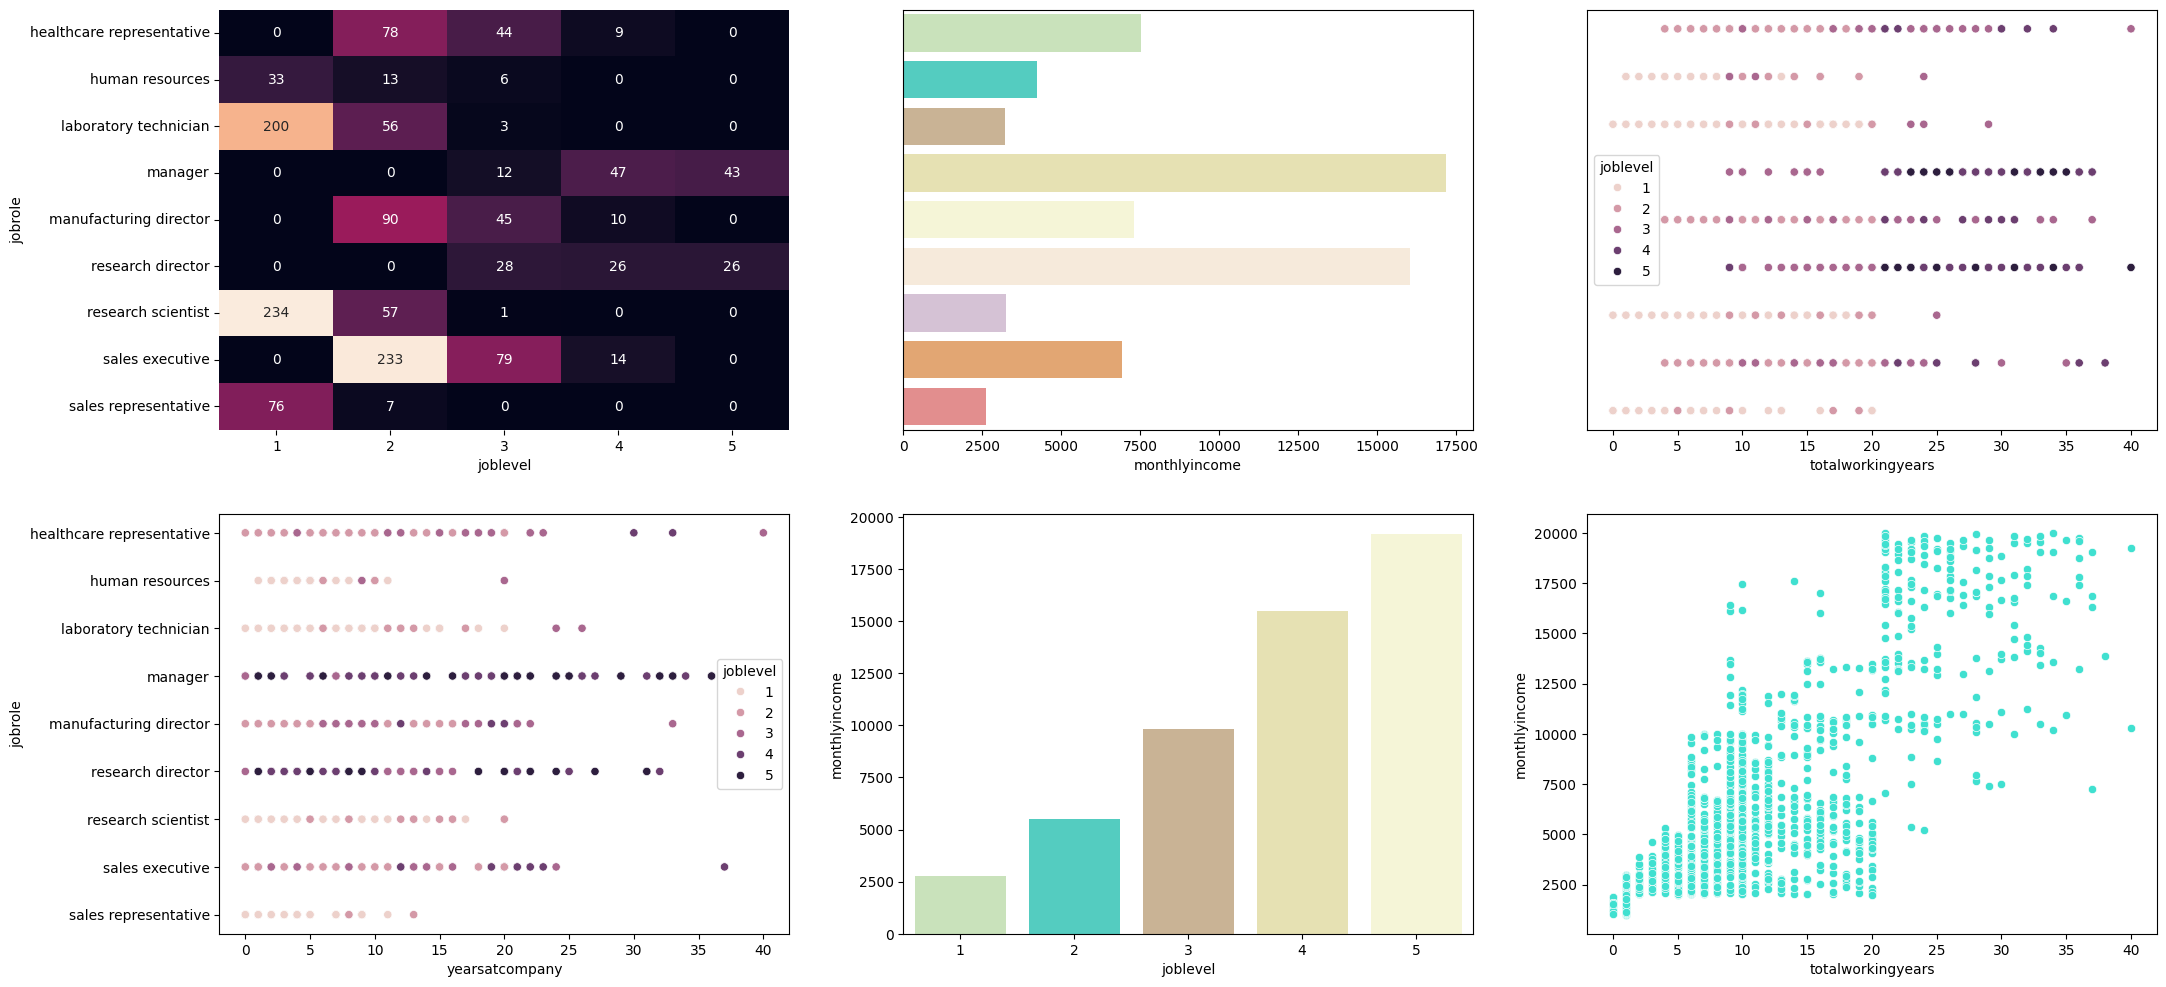

In [15]:
fig,ax = plt.subplots(2,3,figsize=(25,12))

sns.heatmap(pd.crosstab(df['jobrole'], df['joblevel']),annot=True,fmt='d',cbar=False,ax=ax[0][0])

sns.barplot(df.groupby(['jobrole'])['monthlyincome'].mean(),palette=my_col,orient='h',ax=ax[0][1])
ax[0][1].yaxis.set_visible(False)

jbjldf = df[['jobrole','joblevel','totalworkingyears']].sort_values(by='jobrole')
sns.scatterplot(data=jbjldf,x = 'totalworkingyears', y = 'jobrole',hue='joblevel',ax=ax[0][2])
ax[0][2].yaxis.set_visible(False)

jbjlyeardf=df[['jobrole','joblevel','yearsatcompany']].sort_values(by='jobrole')

sns.scatterplot(data=jbjlyeardf, x='yearsatcompany', y='jobrole',hue='joblevel',ax=ax[1][0])

sns.barplot(df.groupby(['joblevel'])['monthlyincome'].mean(),palette=my_col,ax=ax[1][1])

sns.scatterplot(x="totalworkingyears", y="monthlyincome", data=df, color="#40E0D0",ax=ax[1][2])

plt.show()

<Axes: xlabel='performancerating', ylabel='percentsalaryhike'>

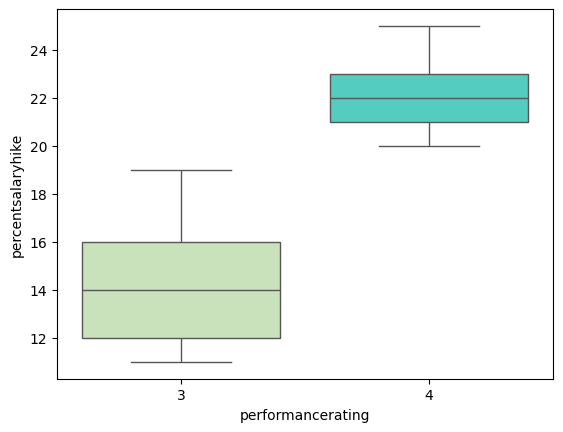

In [16]:
sns.boxplot(data=df,x='performancerating',y='percentsalaryhike',palette=my_col)

In [17]:
df.head()

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,hourlyrate,dailyrate,monthlyrate,monthlyincome,businesstravel,overtime,distancefromhome,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,performancerating,stockoptionlevel,jobsatisfaction,attrition,employeecount
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,8,0,6,4,0,5,11,94,1102,19479,5993,travel_rarely,yes,1,1,2,3,1,3,0,4,yes,1
2,49,male,married,life sciences,research & development,research scientist,2,1,10,3,10,7,1,7,23,61,279,24907,5130,travel_frequently,no,8,3,3,2,4,4,1,2,no,1
4,37,male,single,other,research & development,laboratory technician,1,6,7,3,0,0,0,0,15,92,1373,2396,2090,travel_rarely,yes,2,3,4,2,2,3,0,3,yes,1
5,33,female,married,life sciences,research & development,research scientist,1,1,8,3,8,7,3,0,11,56,1392,23159,2909,travel_frequently,yes,3,3,4,3,3,3,0,3,no,1
7,27,male,married,medical,research & development,laboratory technician,1,9,6,3,2,2,2,2,12,40,591,16632,3468,travel_rarely,no,2,3,1,3,4,3,1,2,no,1


In [18]:
df.columns

Index(['age', 'gender', 'maritalstatus', 'educationfield', 'department',
       'jobrole', 'joblevel', 'numcompaniesworked', 'totalworkingyears',
       'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike',
       'hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome',
       'businesstravel', 'overtime', 'distancefromhome', 'worklifebalance',
       'environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction',
       'performancerating', 'stockoptionlevel', 'jobsatisfaction', 'attrition',
       'employeecount'],
      dtype='object')

## Other Analyses

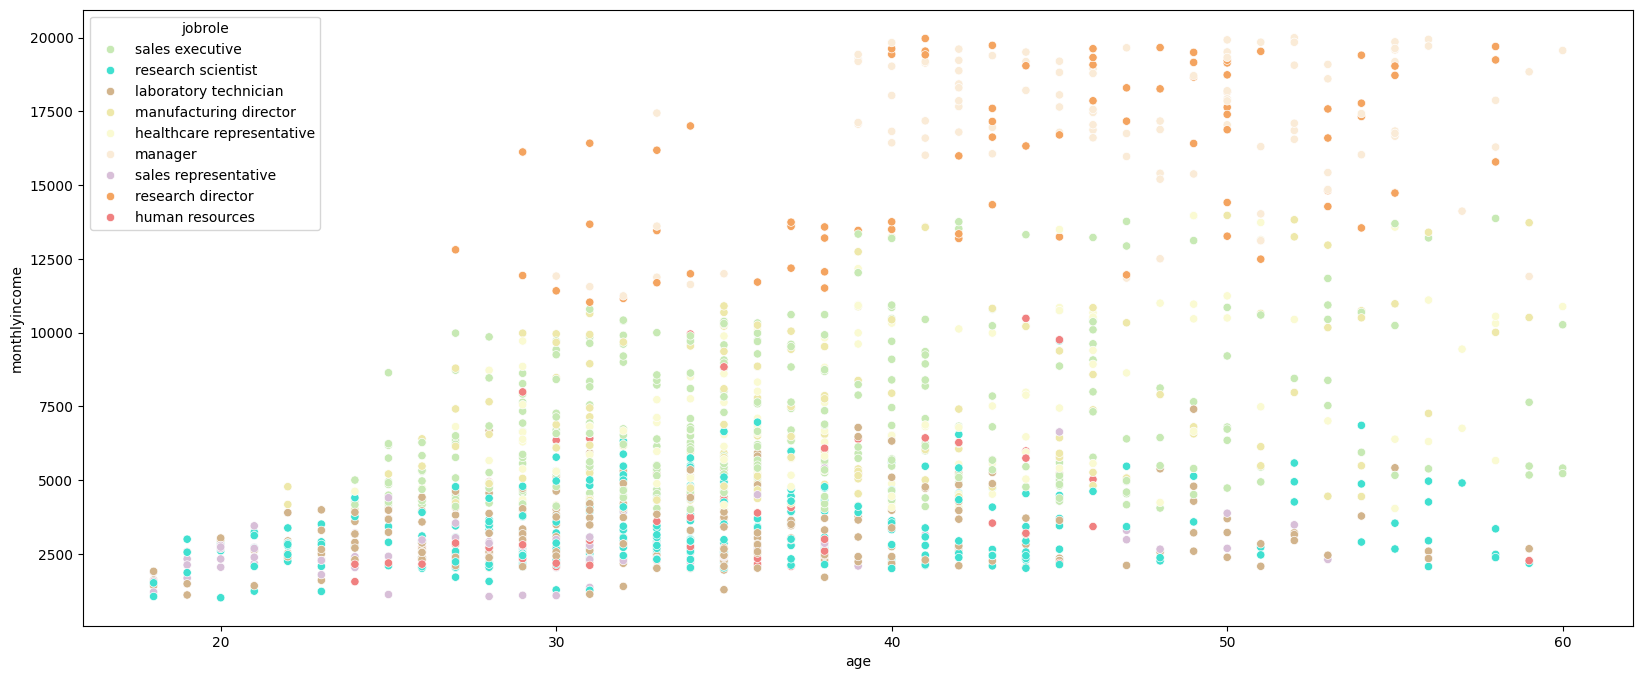

In [19]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df,x='age',y='monthlyincome',hue='jobrole',palette=my_col)
plt.show()

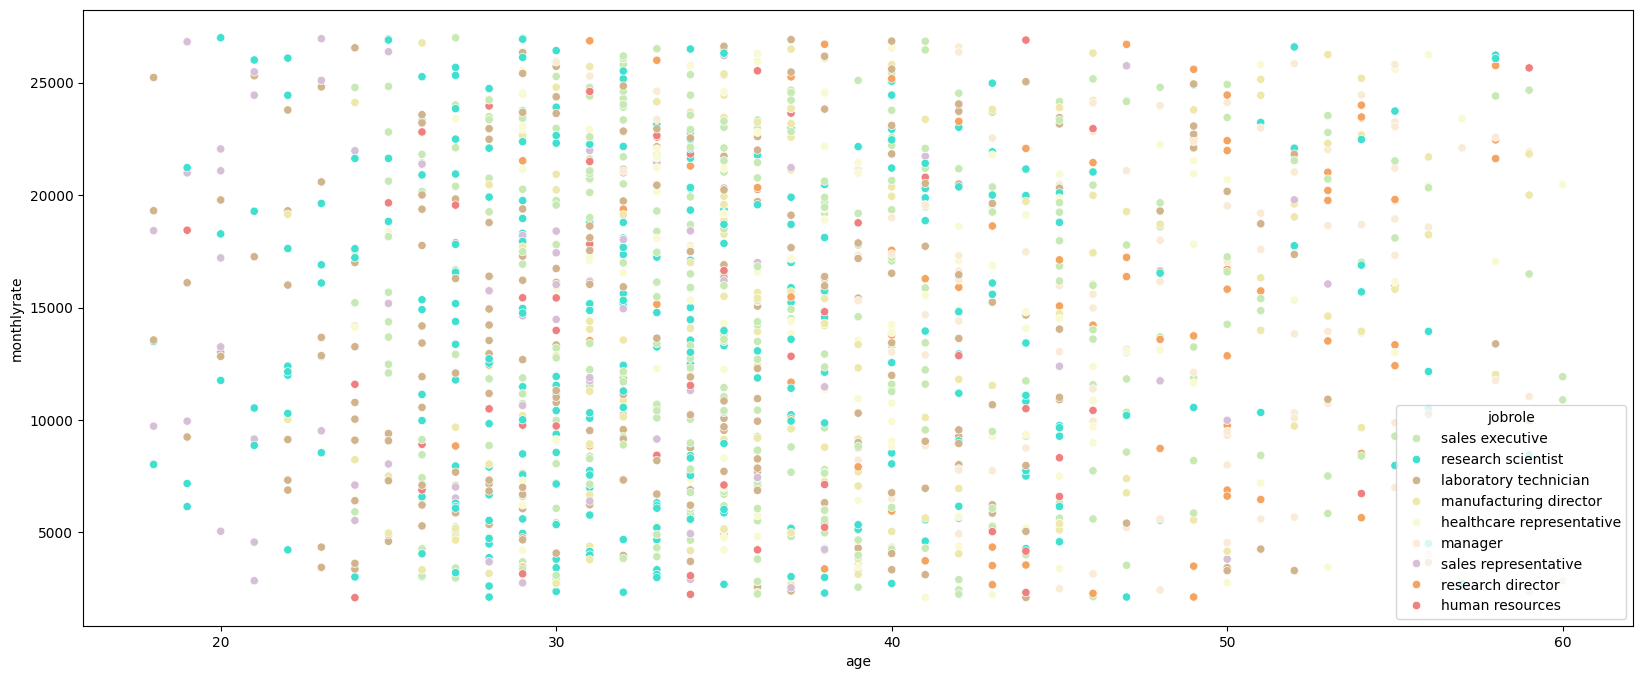

In [20]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df,x='age',y='monthlyrate',hue='jobrole',palette=my_col)
plt.show()

In [21]:
import nbformat
import plotly.express as px

In [44]:
m_df = df.groupby(['maritalstatus','attrition'])['employeecount'].sum().reset_index().sort_values(by=['maritalstatus'], ascending=False)
fig = px.bar(m_df,x='maritalstatus',y='employeecount',color='attrition',barmode='group',title='Marital Status vs Attrition')
fig.update_layout(
    title ={'x':0.5},
    showlegend=False)
fig.show()

In [48]:
m_df = df.groupby(['maritalstatus','attrition'])['employeecount'].sum().reset_index().sort_values(by=['maritalstatus'], ascending=False)
fig = px.bar(m_df,x='maritalstatus',y='employeecount',color='attrition',barmode='group',title='Marital Status vs Attrition',color_discrete_sequence=my_col)
fig.update_layout(
    title ={'x':0.5,'font':{'color' : 'white'}},
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    showlegend=False,
    xaxis = dict(showgrid = False),
    yaxis = dict(showgrid = False)
    )
fig.show()

In [57]:
px.imshow(pd.crosstab(df['jobrole'], df['joblevel']),
          text_auto=True)

In [ ]:
fig = px.scatter(
    df,x ='totalworkingyears',
    y = 'monthlyincome',
    color='jobrole',
    size='petal_length'
)
fig.show()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['age', 'gender', 'maritalstatus', 'educationfield', 'department', 'jobrole', 'joblevel', 'numcompaniesworked', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager', 'percentsalaryhike', 'hourlyrate', 'dailyrate', 'monthlyrate', 'monthlyincome', 'businesstravel', 'overtime', 'distancefromhome', 'worklifebalance', 'environmentsatisfaction', 'jobinvolvement', 'relationshipsatisfaction', 'performancerating', 'stockoptionlevel', 'jobsatisfaction', 'attrition', 'employeecount'] but received: petal_length

In [58]:
df

,age,gender,maritalstatus,educationfield,department,jobrole,joblevel,numcompaniesworked,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,percentsalaryhike,hourlyrate,dailyrate,monthlyrate,monthlyincome,businesstravel,overtime,distancefromhome,worklifebalance,environmentsatisfaction,jobinvolvement,relationshipsatisfaction,performancerating,stockoptionlevel,jobsatisfaction,attrition,employeecount
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,female,single,life sciences,sales,sales executive,2,8,8,0,6,4,0,5,11,94,1102,19479,5993,travel_rarely,yes,1,1,2,3,1,3,0,4,yes,1
2,49,male,married,life sciences,research & development,research scientist,2,1,10,3,10,7,1,7,23,61,279,24907,5130,travel_frequently,no,8,3,3,2,4,4,1,2,no,1
4,37,male,single,other,research & development,laboratory technician,1,6,7,3,0,0,0,0,15,92,1373,2396,2090,travel_rarely,yes,2,3,4,2,2,3,0,3,yes,1
5,33,female,married,life sciences,research & development,research scientist,1,1,8,3,8,7,3,0,11,56,1392,23159,2909,travel_frequently,yes,3,3,4,3,3,3,0,3,no,1
7,27,male,married,medical,research & development,laboratory technician,1,9,6,3,2,2,2,2,12,40,591,16632,3468,travel_rarely,no,2,3,1,3,4,3,1,2,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,male,married,medical,research & development,laboratory technician,2,4,17,3,5,2,0,3,17,41,884,12290,2571,travel_frequently,no,23,3,3,4,3,3,1,4,no,1
2062,39,male,married,medical,research & development,healthcare representative,3,4,9,5,7,7,1,7,15,42,613,21457,9991,travel_rarely,no,6,3,4,2,1,3,1,1,no,1
2064,27,male,married,life sciences,research & development,manufacturing director,2,1,6,0,6,2,0,3,20,87,155,5174,6142,travel_rarely,yes,4,3,2,4,2,4,1,2,no,1
